# Biểu đồ vùng (Area plot), Biểu đồ tần suất (Histogram), và Biểu đồ thanh (Bar plot)

## Giới thiệu

Trong bài Lab này, chúng ta sẽ tiếp tục khám phá thư viện Matplotlib và tìm hiểu cách tạo thêm các biểu đồ, cụ thể là các biểu đồ vùng, biểu đồ tần suất và biểu đồ thanh

## Mục lục

<div class="alert alert-block alert-info" style="margin-top: 20px">

1. [Khám phá tập dữ liệu với *pandas*](#0)<br>
2. [Download và chuẩn bị dữ liệu](#2)<br>
3. [Visualize dữ liệu bằng Matplotlib](#4) <br>
4. [Biểu đồ vùng](#6) <br>
5. [Biểu đồ tần suất](#8) <br>
6. [Biểu đồ thanh](#10) <br>
</div>
<hr>

# Khám phá tập dữ liệu với *pandas* và Matplotlib<a id="0"></a>

Bộ công cụ: Khóa học chủ yếu sẽ dùng [*pandas*](http://pandas.pydata.org/) và [**Numpy**](http://www.numpy.org/) để xử lý dữ liệu (data wrangling), phân tích, và visualization (trực quan hóa). Trong khóa học này, chúng ta sẽ khám phá thư viện sơ đồ chính là [Matplotlib](http://matplotlib.org/).

Tập dữ liệu: Nhập cư đến Canada từ 1980 đến 2013 - [Luồng di cư quốc tế đến và đi từ các quốc gia được chọn - Bản sửa đổi năm 2015](http://www.un.org/en/development/desa/population/migration/data/empirical2/migrationflows.shtml) từ trang web của Liên Hợp Quốc.

Tập dữ liệu chứa dữ liệu hàng năm về dòng người di cư quốc tế được các quốc gia đích ghi lại. Dữ liệu thể hiện cả dòng người nhập cư và dòng người di cưtheo các dữ liệu như place of birth (nơi sinh), citizenship (quốc tịch) hoặc place of previous / next residence (nơi cư trú trước đây / tiếp theo) của cả người nước ngoài và người dân mang quốc tịch. Trong bài học này, chúng ta sẽ tập trung vào dữ liệu Nhập cư Canada.

# Download và chuẩn bị dữ liệu <a id="2"></a>

Import các module chính. Đầu tiên, chúng ta sẽ import hai module phân tích dữ liệu chính: *pandas* và **Numpy**.

In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

Hãy download và import tập dữ liệu Canadian Immigration (Nhập cư Canada) bằng phương thức *pandas* `read_excel()`. Thông thường, trước khi có thể làm điều đó thì chúng ta sẽ cần download một module mà _pandas_ cần để đọc file excel. Module này là **xlrd**. Để giúp bạn làm bài thuận tiện hơn, chúng tôi đã cài đặt module này trước cho bạn, nên bạn không cần lo về điều đó nhé. Nếu không thì bạn sẽ phải cho chạy dòng code dưới đây để cài đặt module **xlrd**:
```
!conda install -c anaconda xlrd --yes
```

Download tập dữ liệu và đọc nó vào khung dữ liệu *pandas*.

In [2]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


Hãy xem 5 mục đầu tiên trong tập dữ liệu.

In [3]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


Hãy cùng xem có bao nhiêu mục nhập trong tập dữ liệu.

In [4]:
# print the dimensions of the dataframe
print(df_can.shape)

(195, 43)


Hãy làm sạch dữ liệu. Chúng ta sẽ sửa đổi tập dữ liệu gốc để giúp tạo visualization dễ dàng hơ. Tham khảo bài Lab `Introduction to Matplotlib and Line Plots` (Giới thiệu về Matplotlib và Biểu đồ đường) để xem mô tả chi tiết của những thay đổi.

#### 1. Làm sạch tập dữ liệu để loại bỏ các cột không cung cấp thông tin cho việc tạo visualization (ví dụ: Type, AREA, REG).

In [5]:
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# let's view the first five elements and see how the dataframe was changed
df_can.head()

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


Mọi người có thể thấy rằng các cột Type, Coverage, AREA, REG, và DEV bị xóa khỏi khung dữ liệu.

#### 2. Đổi tên một số cột để chúng có ý nghĩa.

In [5]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# let's view the first five elements and see how the dataframe was changed
df_can.head()

,Type,Coverage,Country,AREA,Continent,REG,Region,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


Mọi người có thể thấy rằng bây giờ, tên cột có nghĩa hơn nhiều, dù là một người không có chuyên môn cũng hiểu được.

#### 3. Để cho nhất quán, hãy đảm bảo rằng tất cả các nhãn cột đều thuộc kiểu string (xâu).

In [6]:
# let's examine the types of the column labels
all(isinstance(column, str) for column in df_can.columns)

False

Mọi người có thể thấy rằng dòng code trên trả về *False* khi chúng ta kiểm tra xem liệu tất cả các nhãn cột có thuộc kiểu **string** hay không. Vậy, hãy thay đổi tất cả chúng thành kiểu **string**.

In [7]:
df_can.columns = list(map(str, df_can.columns))

# let's check the column labels types now
all(isinstance(column, str) for column in df_can.columns)

True

#### 4. Đặt tên quốc gia làm chỉ mục - điều này sẽ rất hữu ích để tra cứu nhanh các quốc gia bằng phương thức .loc.

In [8]:
df_can.set_index('Country', inplace=True)

# let's view the first five elements and see how the dataframe was changed
df_can.head()

,Type,Coverage,AREA,Continent,REG,Region,DEV,DevName,1980,1981,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,16,39,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,1,0,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Immigrants,Foreigners,903,Africa,912,Northern Africa,902,Developing regions,80,67,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Immigrants,Foreigners,909,Oceania,957,Polynesia,902,Developing regions,0,1,...,0,0,1,0,0,0,0,0,0,0
Andorra,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,0,0,...,0,0,1,1,0,0,0,0,1,1


Mọi người có thể thấy rằng bây giờ, tên quốc gia đã là chỉ mục.

#### 5. Thêm cột total (tổng).

In [15]:
df_can.columns = df_can.columns.astype(str)

In [18]:
years = list(map(str, range(1980, 2014)))

In [19]:

df_can['Total'] = df_can[years].sum(axis=1)

# let's view the first five elements and see how the dataframe was changed
df_can.head()

,Type,Coverage,AREA,Continent,REG,Region,DEV,DevName,1980,1981,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,16,39,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,1,0,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Immigrants,Foreigners,903,Africa,912,Northern Africa,902,Developing regions,80,67,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Immigrants,Foreigners,909,Oceania,957,Polynesia,902,Developing regions,0,1,...,0,1,0,0,0,0,0,0,0,6
Andorra,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,0,0,...,0,1,1,0,0,0,0,1,1,15


Bây giờ, khung dữ liệu có thêm một cột thể hiện tổng số người nhập cư từ mỗi quốc gia trong tập dữ liệu từ 1980 - 2013. Vì vậy, nếu chúng ta in chiều của dữ liệu, chúng ta sẽ nhận được:

In [11]:
print ('data dimensions:', df_can.shape)

data dimensions: (195, 37)


Bây giờ, khung dữ liệu có 38 cột chứ không phải 37 cột như trước.

In [ ]:
# finally, let's create a list of years from 1980 - 2013
# this will come in handy when we start plotting the data
years = list(map(str, range(1980, 2014)))

years

# Visualize dữ liệu bằng Matplotlib<a id="4"></a>

Import `Matplotlib` và **Numpy**.

In [20]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.8.0


# Biểu đồ vùng<a id="6"></a>

Trong module trước, chúng ta đã tạo một biểu đồ đường để visualize 5 quốc gia có nhiều người nhập cư đến Canada nhất từ năm 1980 đến năm 2013. Chỉ cần sửa code một chút thì chúng ta đã có thể visualize biểu đồ này thành một biểu đồ tích lũy, còn được gọi là **Biểu đồ đường xếp chồng** hoặc **Biểu đồ vùng**.

In [21]:
#df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)

# get the top 5 entries
df_top5 = df_can.head()

# transpose the dataframe
df_top5 = df_top5[years].transpose() 

df_top5.head()

Country,Afghanistan,Albania,Algeria,American Samoa,Andorra
1980,16,1,80,0,0
1981,39,0,67,1,0
1982,39,0,71,0,0
1983,47,0,69,0,0
1984,71,0,63,0,0


Theo mặc định, các biểu đồ vùng được xếp chồng lên nhau. Và để tạo ra một biểu đồ vùng xếp chồng, tất cả các giá trị trong mỗi cột phải là dương hoặc phải là âm (mọi giá trị NaN sẽ được đặt mặc định là 0). Để tạo ra một biểu đồ không xếp chồng, hãy truyền `stacked=False`. 

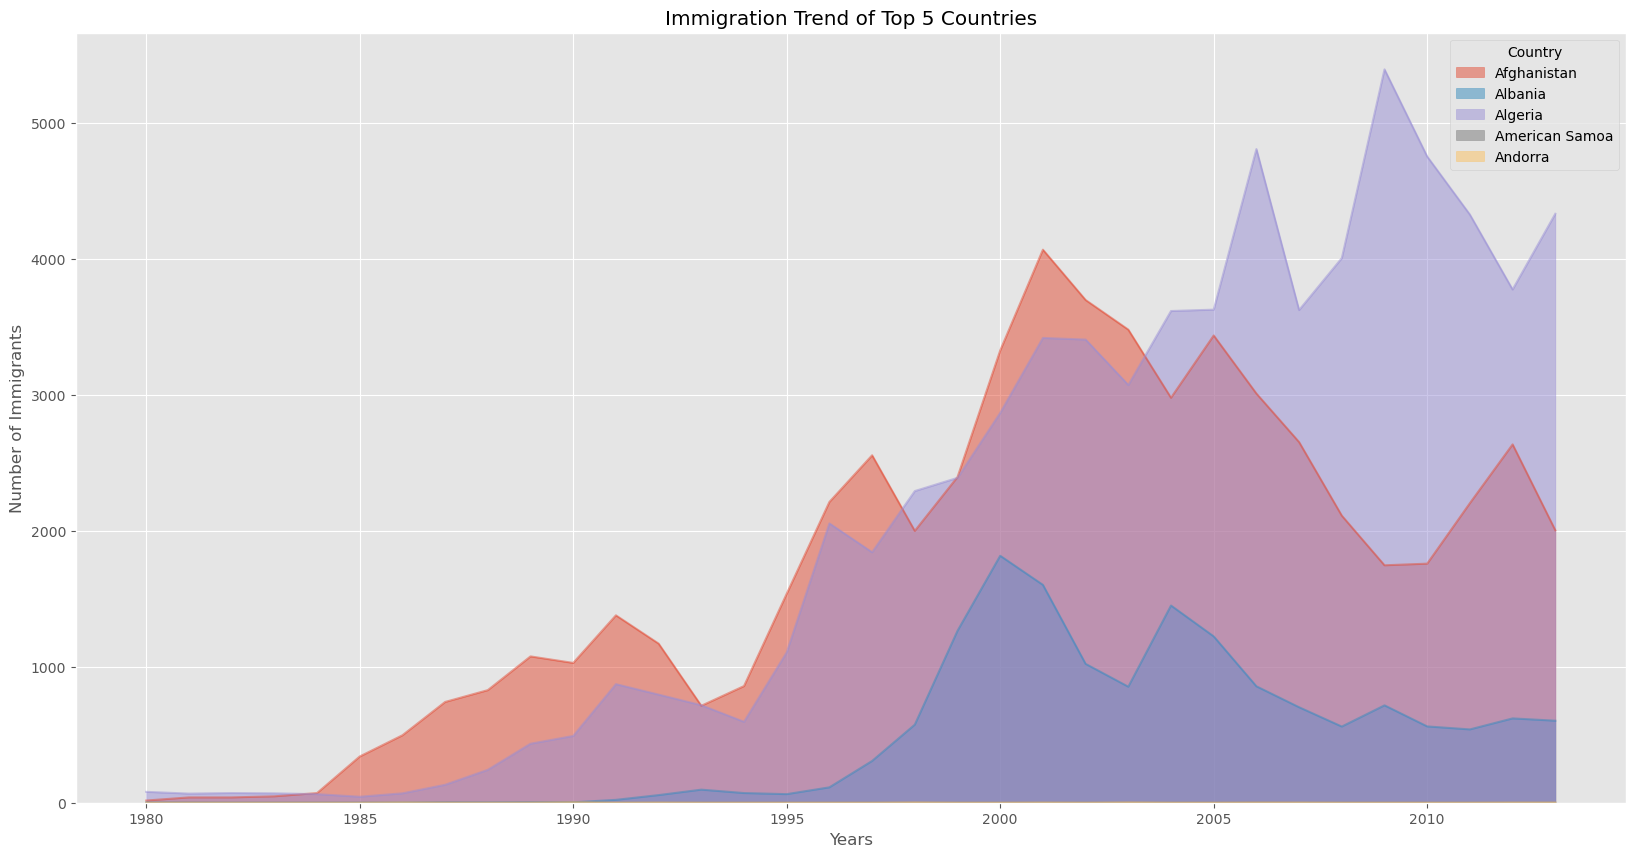

In [22]:
df_top5.index = df_top5.index.map(int) # let's change the index values of df_top5 to type integer for plotting
df_top5.plot(kind='area', 
             stacked=False,
             figsize=(20, 10), # pass a tuple (x, y) size
             )

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

Biểu đồ không xếp chồng có độ đậm nhạt của màu sắc mặc định (giá trị alpha) là 0,5. Chúng ta có thể sửa đổi giá trị này bằng cách truyền tham số `alpha`.

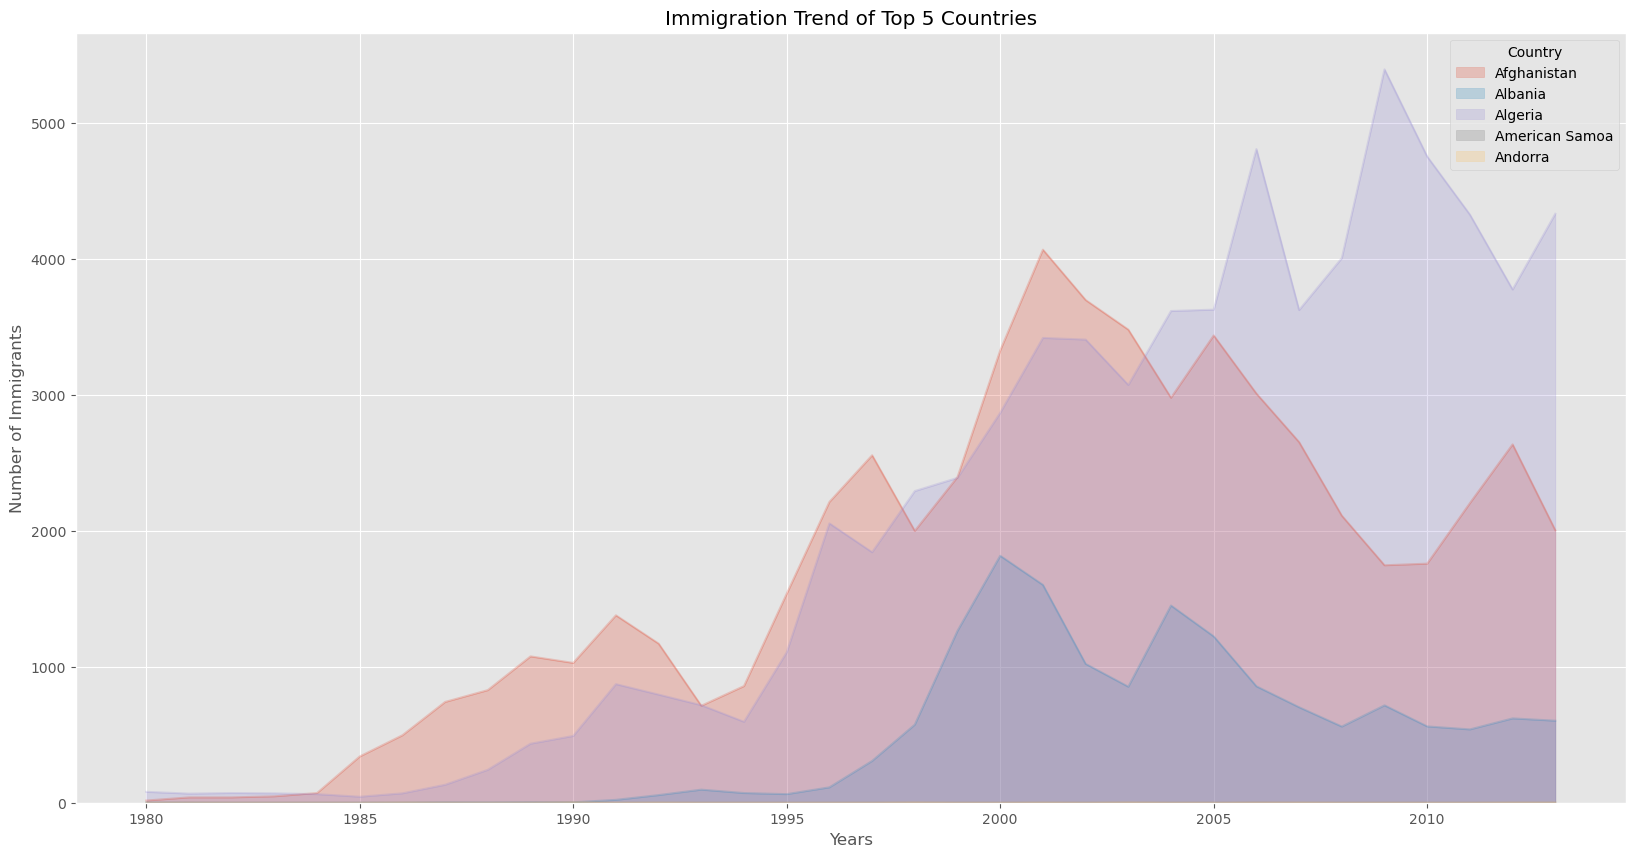

In [23]:
df_top5.plot(kind='area', 
             alpha=0.25, # 0-1, default value a= 0.5
             stacked=False,
             figsize=(20, 10),
            )

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

### Hai kiểu vẽ biểu đồ

Như chúng ta đã tìm hiểu trong các bài giảng video, có hai kiểu / lựa chọn vẽ biểu đồ với `matplotlib`. Vẽ biểu đồ bằng Artist layer và vẽ biểu đồ bằng scripting layer.

**Lựa chọn 1: Scripting layer (Phương pháp tiếp cận thủ tục) - sử dụng matplotlib.pyplot làm 'plt' **

Bạn có thể dùng `plt` tức là `matplotlib.pyplot` và thêm nhiều phần tử hơn bằng cách gọi các phương thức khác nhau theo thủ tục; ví dụ, `plt.title(...)` để thêm tiêu đề hoặc `plt.xlabel(...)` để thêm nhãn vào trục x.
```python
    # Option 1: This is what we have been using so far
    df_top5.plot(kind='area', alpha=0.35, figsize=(20, 10)) 
    plt.title('Immigration trend of top 5 countries')
    plt.ylabel('Number of immigrants')
    plt.xlabel('Years')
```

**Lựa chọn 2: Artist layer (Phương pháp hướng đối tượng) - nên dùng instance `Axes` từ Matplotlib **

Bạn có thể dùng instance `Axes` của biểu đồ hiện tại và lưu nó trong một biến (ví dụ như `ax`). Bạn có thể thêm nhiều phần tử hơn bằng cách gọi các phương thức sau khi đã thay đổi cú pháp của chúng một chút (thêm "*set_*" vào các phương thức trước). Ví dụ, dùng `ax.set_title()` chứ không dùng `plt.title()` để thêm tiêu đề,  hoặc `ax.set_xlabel()` chứ không phải `plt.xlabel()` để thêm nhãn vào trục x. 

Đôi khi, lựa chọn này có độ trong suốt và linh hoạt hơn để sử dụng cho các biểu đồ nâng cao (đặc biệt khi có nhiều biểu đồ, ở phần sau thì các bạn sẽ thấy điều này).

Trong khóa học này, chúng ta sẽ chỉ dùng **scripting layer**, trừ khi có một số visualization nâng cao thì mới cần dùng **artist layer** để thao tác với các khía cạnh nâng cao của biểu đồ.

Text(0.5, 0, 'Years')

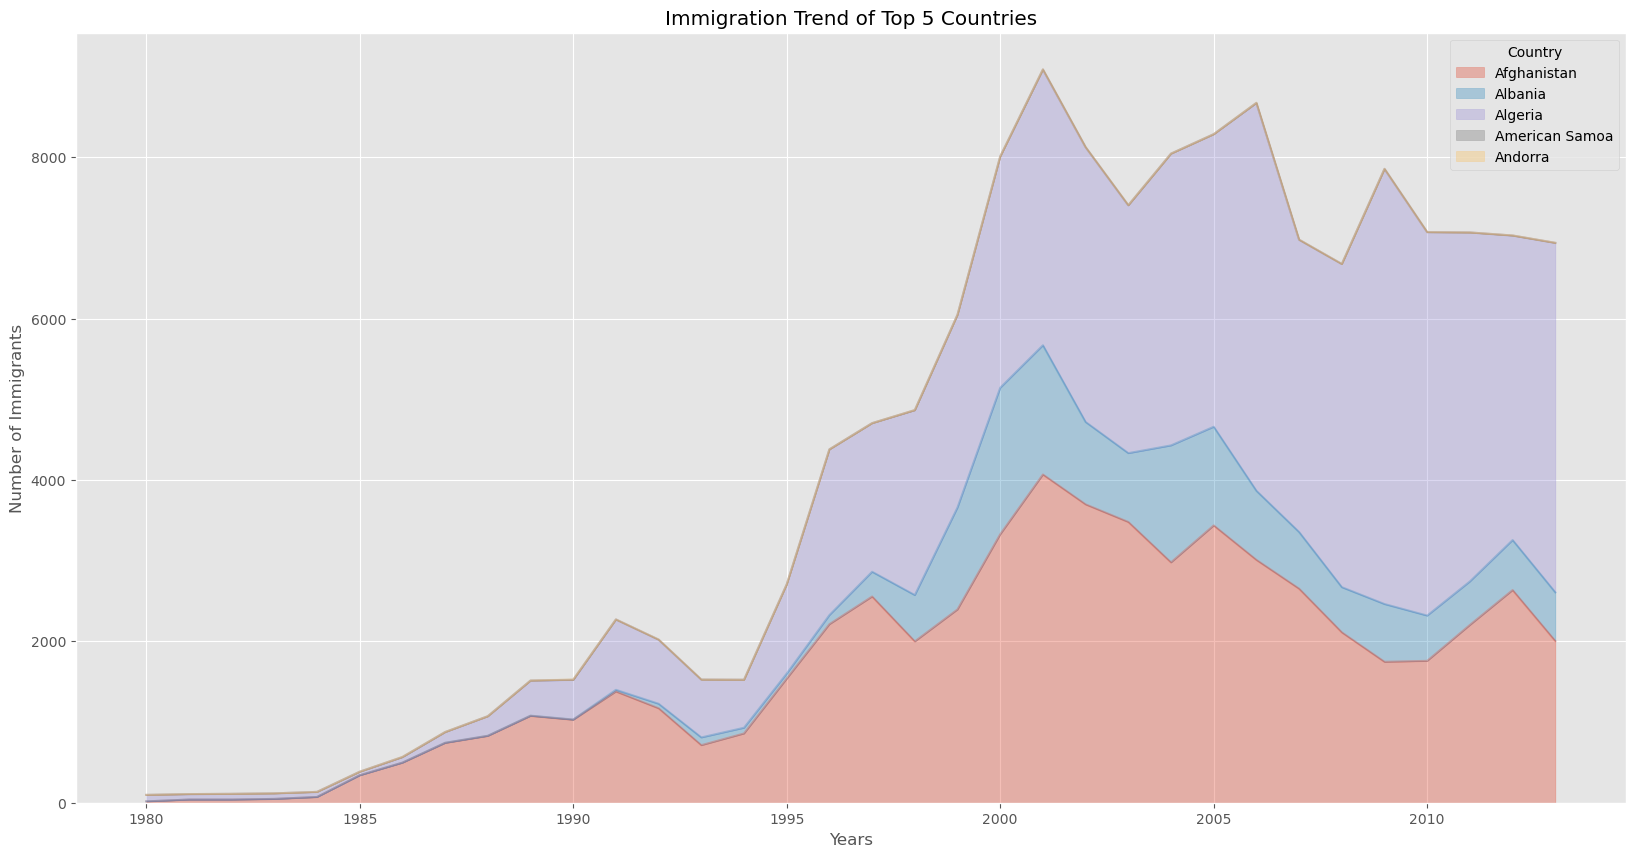

In [24]:
# option 2: preferred option with more flexibility
ax = df_top5.plot(kind='area', alpha=0.35, figsize=(20, 10))

ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

**Câu hỏi**: Dùng scripting layer để tạo biểu đồ vùng xếp chồng của 5 quốc gia có số người nhập cư vào Canada ít nhất **từ** 1980 đến 2013. Sử dụng độ đậm nhạt của màu sắc trong đồ thị là 0,45 (alpha =0,45).

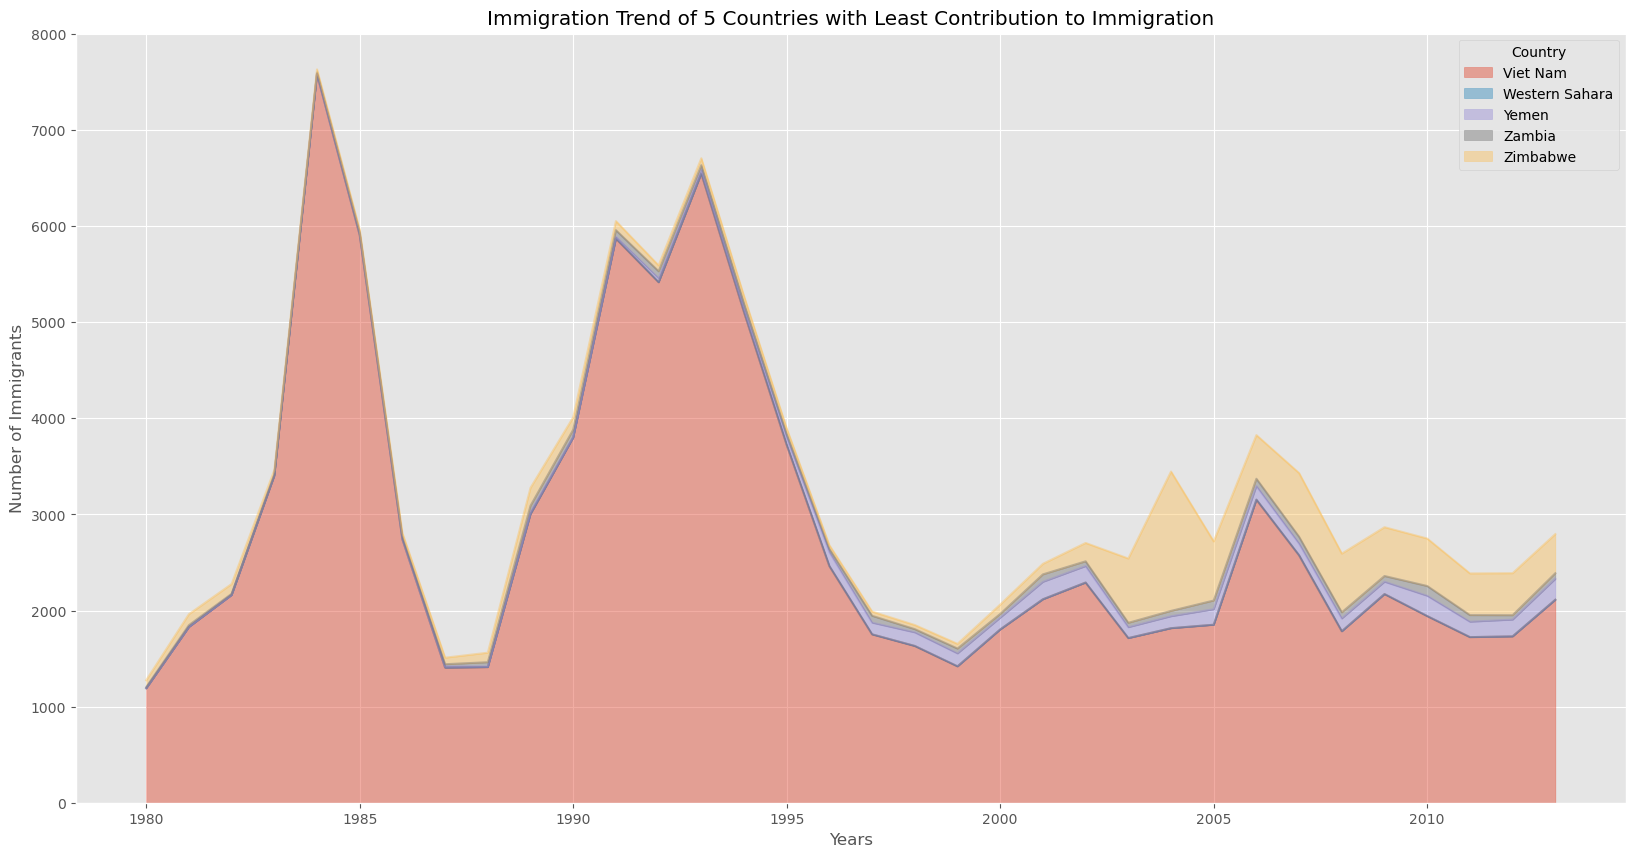

In [25]:
### type your answer here
df_least5 = df_can.tail(5)
df_least5 = df_least5[years].transpose() 
df_least5.head()

##create plot
df_least5.plot(kind='area', alpha=0.45, figsize=(20, 10))
plt.title('Immigration Trend of 5 Countries with Least Contribution to Immigration')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.show()

Click đúp __vào đây__  để xem lời giải.
<!-- The correct answer is:
\\ # get the 5 countries with the least contribution
df_least5 = df_can.tail(5)
-->

<!--
\\ # transpose the dataframe
df_least5 = df_least5[years].transpose() 
df_least5.head()
-->

<!--
df_least5.index = df_least5.index.map(int) # let's change the index values of df_least5 to type integer for plotting
df_least5.plot(kind='area', alpha=0.45, figsize=(20, 10)) 
-->

<!--
plt.title('Immigration Trend of 5 Countries with Least Contribution to Immigration')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
-->

<!--
plt.show()
-->

**Câu hỏi**: Dùng artist layer tạo biểu đồ vùng không xếp chồng của 5 quốc gia có số người nhập cư vào Canada ít nhất **từ** 1980 đến 2013. Sử dụng độ đậm nhạt của màu sắc trong đồ thị là 0,55 (alpha =0,55)

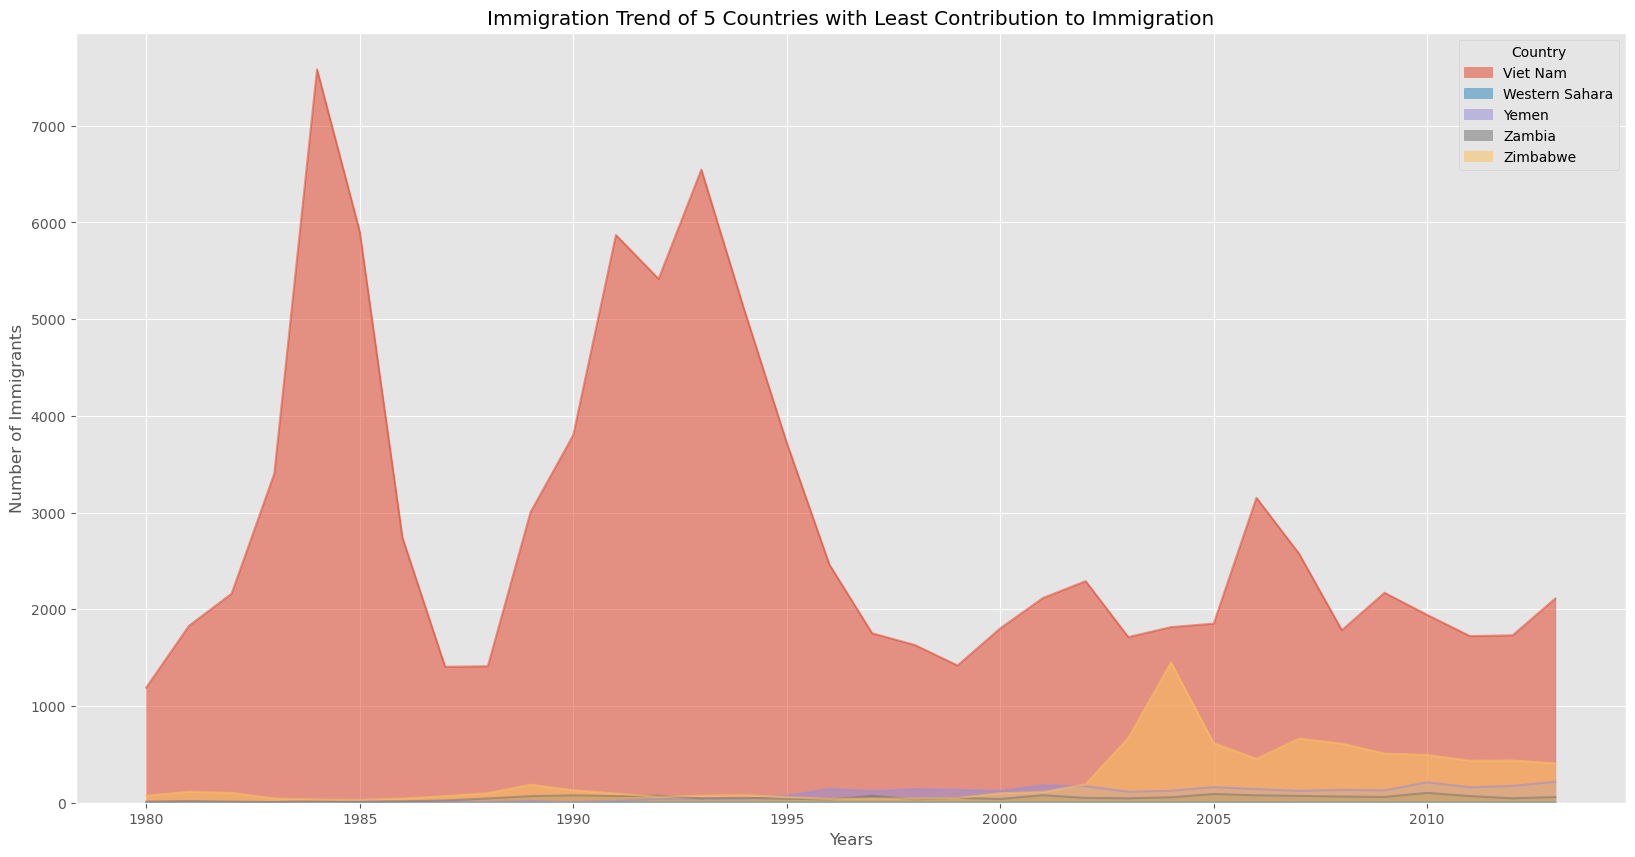

In [27]:
### type your answer here

df_least5 = df_can.tail(5)
df_least5 = df_least5[years].transpose() 
df_least5.head()

##create plot
df_least5.plot(kind='area', alpha=0.55,stacked=False, figsize=(20, 10))
plt.title('Immigration Trend of 5 Countries with Least Contribution to Immigration')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.show()



Click đúp __vào đây__ để xem lời giải.
<!-- The correct answer is:
\\ # get the 5 countries with the least contribution
df_least5 = df_can.tail(5)
-->

<!--
\\ # transpose the dataframe
df_least5 = df_least5[years].transpose() 
df_least5.head()
-->

<!--
df_least5.index = df_least5.index.map(int) # let's change the index values of df_least5 to type integer for plotting
-->

<!--
ax = df_least5.plot(kind='area', alpha=0.55, stacked=False, figsize=(20, 10))
-->

<!--
ax.set_title('Immigration Trend of 5 Countries with Least Contribution to Immigration')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')
-->

# Biểu đồ tần suất<a id="8"></a>

Biểu đồ tần suất là một cách biểu diễn phân phối *tần suất* của tập dữ liệu số. Cách thức hoạt động là nó phân vùng trục x thành *các thùng*, gán mỗi điểm dữ liệu trong tập dữ liệu vào một thùng, sau đó đếm số điểm dữ liệu đã được gán cho mỗi thùng. Vậy, trục y là tần suất hay số điểm dữ liệu trong mỗi thùng. Lưu ý rằng, chúng ta có thể thay đổi kích thước thùng và thường người ta cần phải chỉnh sửa nó để phân phối được hiển thị đẹp mắt nhất.

**Câu hỏi:** Sự phân phối tần suất của số lượng (dân số) những người nhập cư mới từ các quốc gia khác nhau đến Canada trong năm 2013 là bao nhiêu?

Trước khi chúng ta tiếp tục tạo biểu đồ tần suất, đầu tiên, hãy xem xét dữ liệu được chia thành các khoảng. Để làm vậy, chúng ta sẽ dùng phương thức `histrogram` của **Numpy** để lấy các phạm vi của thùng và số lượng tần suất như sau: 

In [28]:
# let's quickly view the 2013 data
df_can['2013'].head()

Country
Afghanistan       2004
Albania            603
Algeria           4331
American Samoa       0
Andorra              1
Name: 2013, dtype: int64

In [29]:
# np.histogram returns 2 values
count, bin_edges = np.histogram(df_can['2013'])

print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


Theo mặc định, phương thức `histrogram` chia tập dữ liệu thành 10 thùng (bin). Hình bên dưới tóm tắt các khoảng của thùng cũng như phân phối tần suất nhật cư vào năm 2013. Chúng ta có thể thấy rằng vào năm 2013:
* 178 quốc gia với số người nhập cư từ 0 đến 3412.9 
* 11 quốc gia với số người nhập cư từ 3412.9 đến 6825.8 
* 1 quốc gia với số người nhập cư từ 6285.8 đến 10238.7, v.v.

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Images/Mod2Fig1-Histogram.JPG" align="center" width=800>

Chúng ta có thể dễ dàng vẽ biểu đồ phân phối này bằng cách truyền `kind = hist` vào `plot ()`.

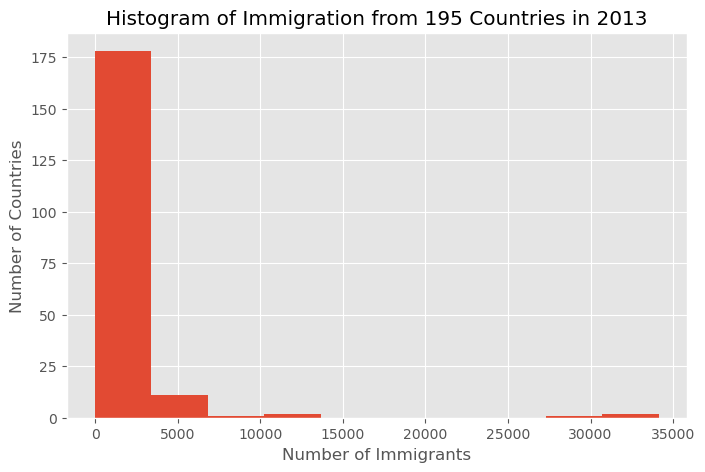

In [30]:
df_can['2013'].plot(kind='hist', figsize=(8, 5))

plt.title('Histogram of Immigration from 195 Countries in 2013') # add a title to the histogram
plt.ylabel('Number of Countries') # add y-label
plt.xlabel('Number of Immigrants') # add x-label

plt.show()

Trong biểu đồ trên, trục x biểu diễn phạm vi dân số của những người nhập cư trong các khoảng 3412,9. Trục y biểu diễn số quốc gia đã đóng góp vào dân số nói trên.

Mọi người có thể thấy rằng các nhãn trục x không khớp với kích thước thùng. Chúng ta có thể khắc phục điều này bằng cách truyền từ khóa `xticks` có chứa danh sách các kích thước thùng, với cú pháp như sau:

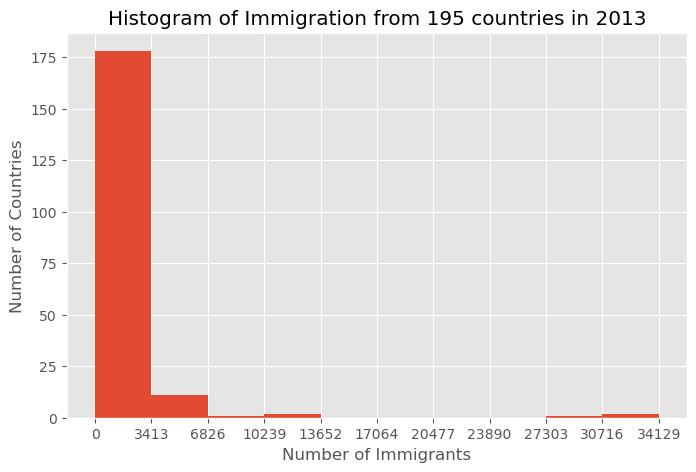

In [16]:
# 'bin_edges' is a list of bin intervals
count, bin_edges = np.histogram(df_can['2013'])

df_can['2013'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('Histogram of Immigration from 195 countries in 2013') # add a title to the histogram
plt.ylabel('Number of Countries') # add y-label
plt.xlabel('Number of Immigrants') # add x-label

plt.show()

*Lưu ý thêm:* Thay vào đó, chúng ta có thể dùng `df_can['2013'].plot.hist()`. Trên thực tế, trong suốt bài học này, sử dụng `some_data.plot(kind='type_plot', ...)` thì cũng tương đương như sử dụng `some_data.plot.type_plot(...)`. Tức là, truyền kiểu biểu đồ làm đối số cũng giống như truyền kiểu biểu đồ làm phương thức.
Để biết thêm thông tin, hãy xem tài liệu *pandas* http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html.

Chúng ta cũng có thể vẽ nhiều biểu đồ tần suất vẫn trên biểu đồ đó. Ví dụ: hãy thử trả lời các câu hỏi sau bằng biểu đồ tần suất.

**Câu hỏi**: Sự phân phối nhập cư của Đan Mạch, Na Uy và Thụy Điển trong những năm 1980 - 2013 là gì?

In [31]:
# let's quickly view the dataset 
df_can.loc[['Denmark', 'Norway', 'Sweden'], years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,272,293,299,106,93,73,93,109,129,129,...,89,62,101,97,108,81,92,93,94,81
Norway,116,77,106,51,31,54,56,80,73,76,...,73,57,53,73,66,75,46,49,53,59
Sweden,281,308,222,176,128,158,187,198,171,182,...,129,205,139,193,165,167,159,134,140,140


<Axes: ylabel='Frequency'>

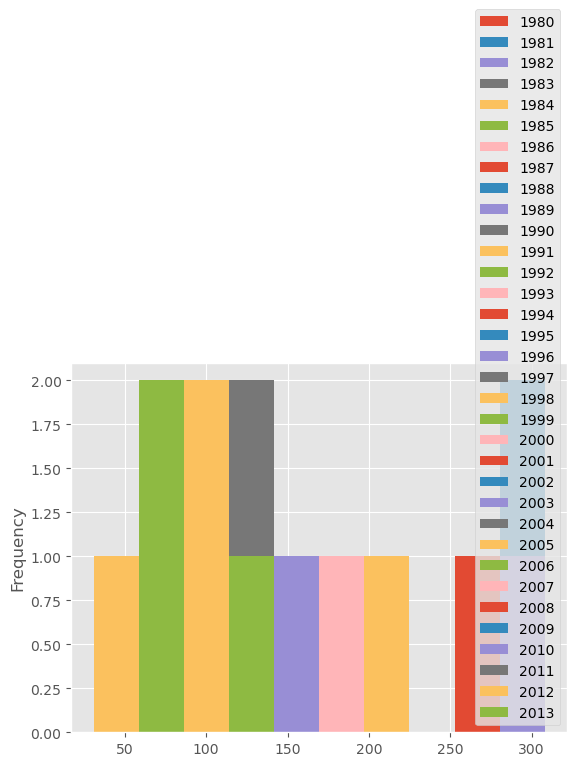

In [32]:
# generate histogram
df_can.loc[['Denmark', 'Norway', 'Sweden'], years].plot.hist()

Có điều gì đó không ổn lắm nhỉ! 

Đừng lo, bạn sẽ thường xuyên gặp những tình huống như thế này khi vẽ biểu đồ. Giải pháp thường nằm ở cách chúng ta cấu trúc tập dữ liệu cơ bản.
Thay vì vẽ biểu đồ phân phối tần suất dân số của 3 quốc gia, *pandas* vẽ biểu đồ phân phối theo `years` (các năm).

Chúng ta có thể dễ dàng khắc phục điều này bằng cách hoán vị tập dữ liệu trước, sau đó vẽ biểu đồ như hình dưới đây.



In [33]:
# transpose dataframe
df_t = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_t.head()

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


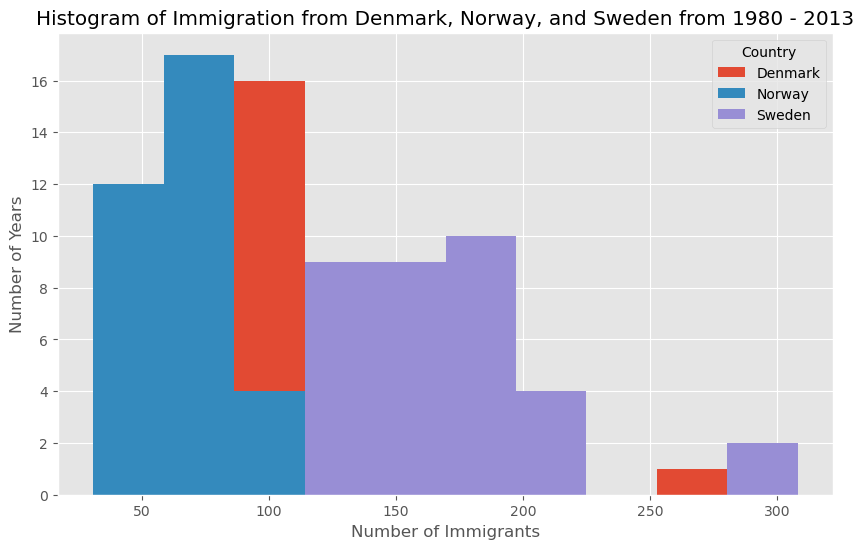

In [34]:
# generate histogram
df_t.plot(kind='hist', figsize=(10, 6))

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

Hãy sửa đổi một chút để cải thiện tác động và tính thẩm mỹ của biểu đồ trước:
* tăng kích thước thùng lên 15 bằng cách truyền tham số `bins 
* đặt độ trong suốt lên 60% bằng cách truyền tham số `alpha` 
* gắn nhãn trục x bằng cách truyền tham số `x-label` 
* thay đổi màu sắc của các biểu đồ bằng cách truyền tham số `color` 

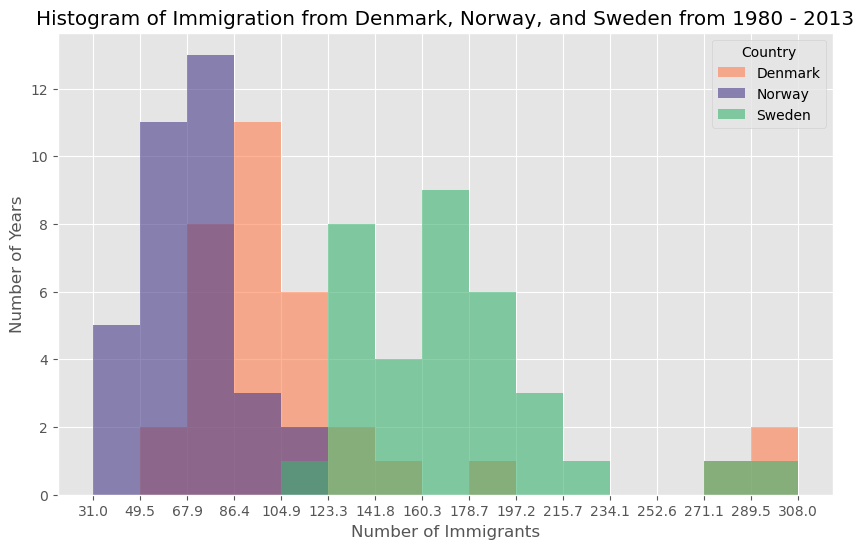

In [35]:
# let's get the x-tick values
count, bin_edges = np.histogram(df_t, 15)

# un-stacked histogram
df_t.plot(kind ='hist', 
          figsize=(10, 6),
          bins=15,
          alpha=0.6,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen']
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

Tip:
Để có danh sách đầy đủ các màu có sẵn trong Matplotlib, hãy chạy code sau trong shell python của bạn:
```python
import matplotlib
for name, hex in matplotlib.colors.cnames.items():
    print(name, hex)
```

Nếu chúng ta không muốn các biểu đồ chồng lên nhau, chúng ta có thể xếp chồng chúng bằng cách dùng tham số `stacked`. Hãy điều chỉnh các nhãn trục x min và max để xóa khoảng cách thừa trên các cạnh của biểu đồ. Chúng ta có thể truyền một tuple (min,max) bằng tham số `xlim` giống như bên dưới.

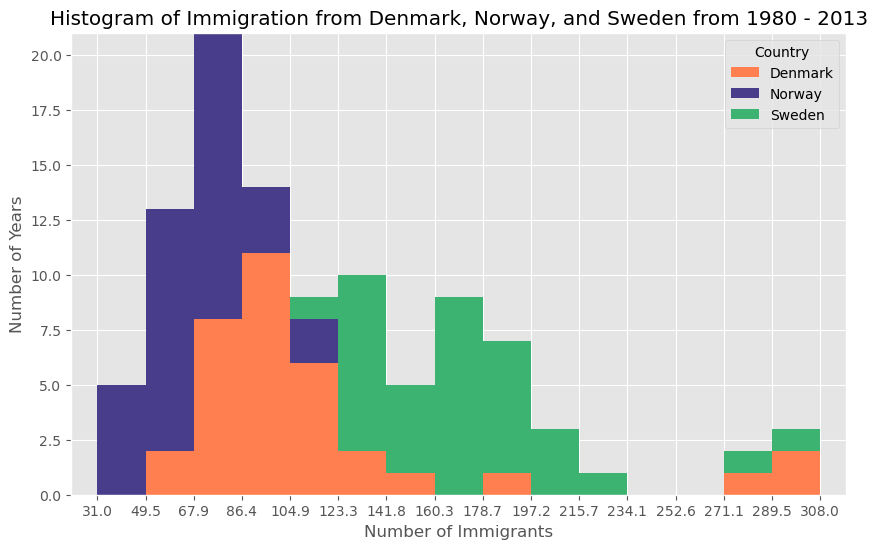

In [36]:
count, bin_edges = np.histogram(df_t, 15)
xmin = bin_edges[0] - 10   #  first bin value is 31.0, adding buffer of 10 for aesthetic purposes 
xmax = bin_edges[-1] + 10  #  last bin value is 308.0, adding buffer of 10 for aesthetic purposes

# stacked Histogram
df_t.plot(kind='hist',
          figsize=(10, 6), 
          bins=15,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen'],
          stacked=True,
          xlim=(xmin, xmax)
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants') 

plt.show()

**Câu hỏi**: Sử dụng scripting layer để hiển thị sự phân phối nhập cư của Hy Lạp, Albania và Bulgaria trong những năm 1980 - 2013? Sử dụng một biểu đồ chồng chéo có 15 thùng và độ đậm nhạt của màu sắc là alpha = 0,35.

In [37]:
### type your answer here
df_cof = df_can.loc[['Greece', 'Albania', 'Bulgaria'], years]
df_cof = df_cof.transpose()
count, bin_edges = np.histogram(df_cof, 15)

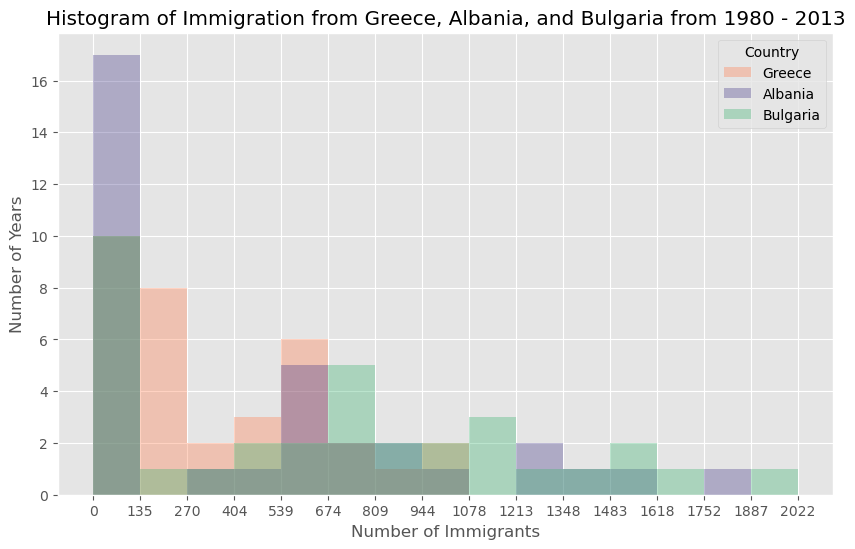

In [38]:
df_cof.plot(kind ='hist',
            figsize=(10, 6),
            bins=15,
            alpha=0.35,
            xticks=bin_edges,
            color=['coral', 'darkslateblue', 'mediumseagreen']
            )
plt.title('Histogram of Immigration from Greece, Albania, and Bulgaria from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')
plt.show()

Click đúp __vào đây__ để xem lời giải.
<!-- The correct answer is:
\\ # create a dataframe of the countries of interest (cof)
df_cof = df_can.loc[['Greece', 'Albania', 'Bulgaria'], years]
-->

<!--
\\ # transpose the dataframe
df_cof = df_cof.transpose() 
-->

<!--
\\ # let's get the x-tick values
count, bin_edges = np.histogram(df_cof, 15)
-->

<!--
\\ # Un-stacked Histogram
df_cof.plot(kind ='hist',
            figsize=(10, 6),
            bins=15,
            alpha=0.35,
            xticks=bin_edges,
            color=['coral', 'darkslateblue', 'mediumseagreen']
            )
-->

<!--
plt.title('Histogram of Immigration from Greece, Albania, and Bulgaria from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')
-->

<!--
plt.show()
-->

# Biểu đồ thanh (Khung dữ liệu) <a id="10"></a>

Biểu đồ thanh là một cách biểu diễn dữ liệu trong đó *chiều dài* của các thanh thể hiện độ lớn / kích thước của feature / biến. Biểu đồ thanh thường biểu diễn các biến số và biến phân loại được nhóm lại trong các khoảng.

Để tạo một biểu đồ thanh, chúng ta có thể truyền một trong hai đối số qua tham số `kind` trong `plot()`:

* `kind=bar` tạo một biểu đồ thanh *dọc* 
* `kind=barh` tạo một biểu đồ thanh *ngang* 

**Biểu đồ thanh dọc**

Trong biểu đồ thanh dọc, trục x được sử dụng để gắn nhãn và chiều dài của các thanh trên trục y tương ứng với độ lớn của biến được đo. Biểu đồ thanh dọc rất hữu ích trong việc phân tích dữ liệu chuỗi thời gian. Một điểm bất lợi là chúng không có nhiều không gian để gắn nhãn văn bản dưới chân mỗi thanh.

**Hãy bắt đầu với việc phân tích ảnh hưởng của Khủng hoảng tài chính ở Iceland (Iceland's Financial Crisis):**

Khủng hoảng tài chính Iceland 2008 - 2011 là một sự kiện kinh tế và chính trị lớn ở Iceland. So với quy mô nền kinh tế của Iceland thì sự sụp đổ hệ thống ngân hàng của Iceland là sự cố lớn nhất mà bất kỳ quốc gia nào từng trải qua trong lịch sử kinh tế. Cuộc khủng hoảng đã dẫn đến suy thoái kinh tế nghiêm trọng trong năm 2008 - 2011 và tình trạng bất ổn chính trị nghiêm trọng.

**Câu hỏi:** Hãy so sánh số lượng người nhập cư Iceland (country = 'Iceland') đến Canada từ năm 1980 đến năm 2013.

In [39]:
# step 1: get the data
df_iceland = df_can.loc['Iceland', years]
df_iceland.head()

1980    17
1981    33
1982    10
1983     9
1984    13
Name: Iceland, dtype: object

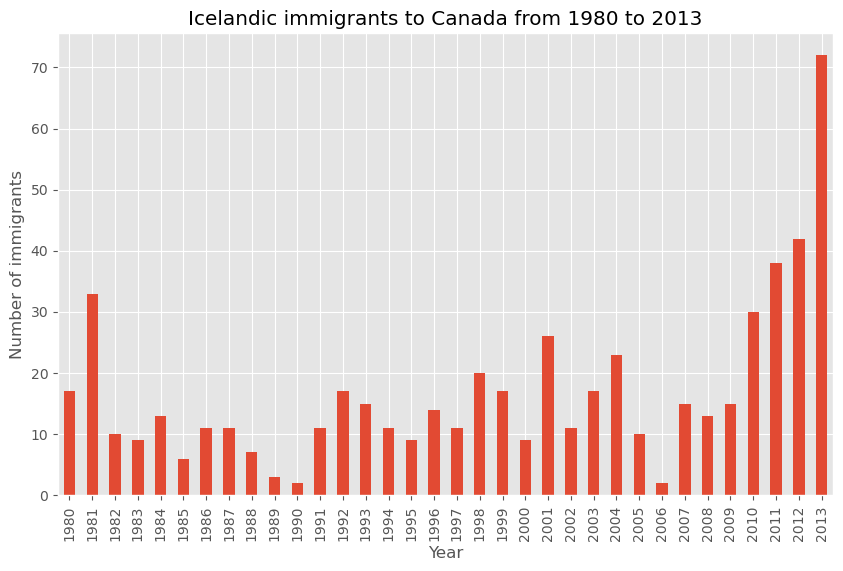

In [40]:
# step 2: plot data
df_iceland.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Number of immigrants') # add y-label to the plot
plt.title('Icelandic immigrants to Canada from 1980 to 2013') # add title to the plot

plt.show()

Biểu đồ thanh ở trên cho thấy tổng số người nhập cư được chia nhỏ theo mỗi năm. Chúng ta có thể thấy rõ tác động của cuộc khủng hoảng tài chính; số lượng người nhập cư đến Canada bắt đầu tăng nhanh sau năm 2008.

Hãy chú thích điều này trên biểu đồ bằng phương thức `annotate` của **scripting layer** hoặc **giao diện pyplot**. Chúng tôi sẽ truyền các tham số sau:
- `s`: str, văn bản để chú thích.
- `xy`: Tuple chỉ định điểm (x,y) để chú thích (trong trường hợp này là điểm cuối mũi tên).
- `xytext`: Tuple chỉ định điểm (x,y) để đặt văn bản (trong trường hợp này là điểm đầu mũi tên).
- `xycoords`: Hệ tọa độ chứa xy - 'data' sử dụng hệ tọa độ của đối tượng được chú thích (mặc định).
- `arrowprops`: Sử dụng từ điển các thuộc tính để vẽ mũi tên:
    - `arrowstyle`: Chỉ định kiểu mũi tên, `'->'` là mũi tên tiêu chuẩn.
    - `connectionstyle`: Chỉ định kiểu kết nối. `arc3` là một đường thẳng.
    - `color`: Chỉ định màu mũi tên.
    - `lw`: Chỉ định độ rộng của đường.

Bạn nên đọc tài liệu Matplotlib để biết thêm chi tiết về các chú thích:
http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.annotate.

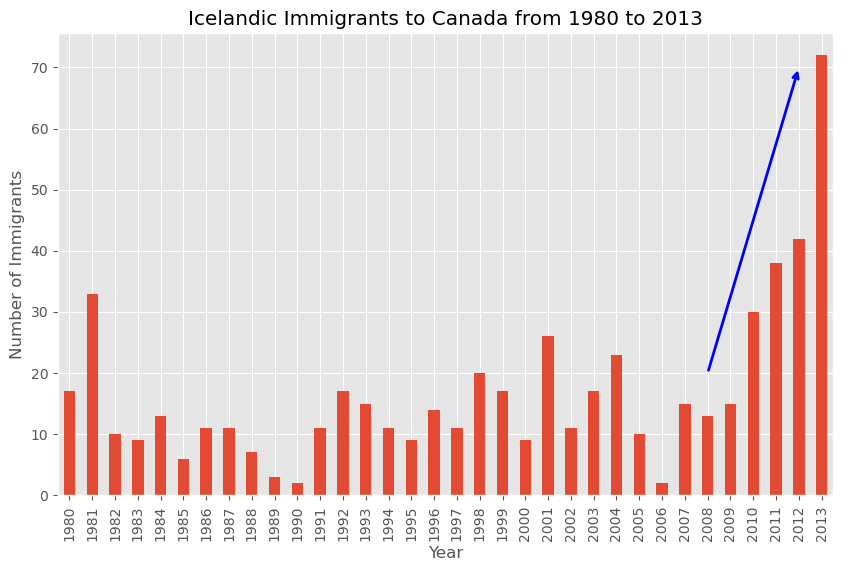

In [41]:
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90) # rotate the bars by 90 degrees

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',                      # s: str. Will leave it blank for no text
             xy=(32, 70),             # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),         # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',         # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )

plt.show()

Hãy chú thích một văn bản trên mũi tên. Chúng ta sẽ truyền thêm các tham số sau:
- `rotation`: góc xoay của văn bản tính theo độ (ngược chiều kim đồng hồ)
- `va`: căn chỉnh theo chiều dọc của văn bản [‘center’ | ‘top’ | ‘bottom’ | ‘baseline’]
- `ha`: căn chỉnh theo chiều ngang của văn bản [‘center’ | ‘right’ | ‘left’]

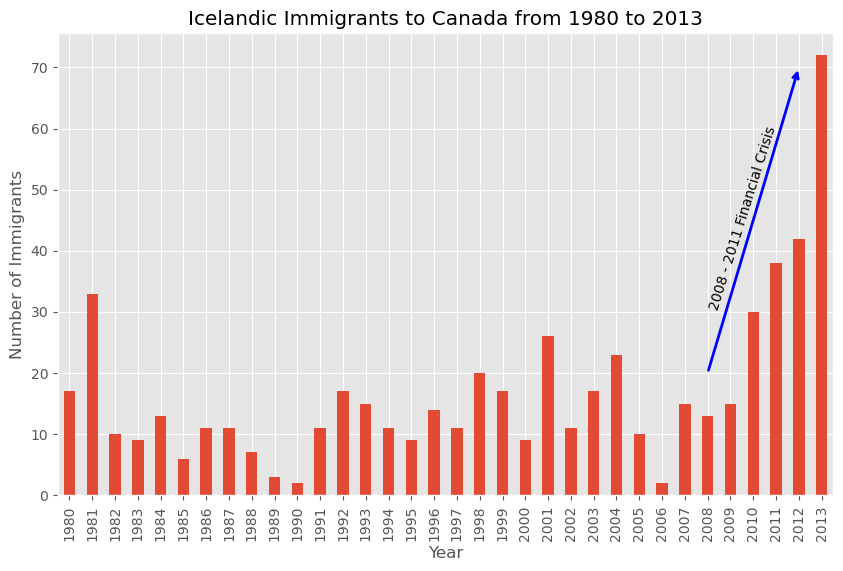

In [42]:
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90) 

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',                      # s: str. will leave it blank for no text
             xy=(32, 70),             # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),         # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',         # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )

# Annotate Text
plt.annotate('2008 - 2011 Financial Crisis', # text to display
             xy=(28, 30),                    # start the text at at point (year 2008 , pop 30)
             rotation=72.5,                  # based on trial and error to match the arrow
             va='bottom',                    # want the text to be vertically 'bottom' aligned
             ha='left',                      # want the text to be horizontally 'left' algned.
            )

plt.show()

**Biểu đồ thanh ngang**

Đôi khi, việc biểu diễn dữ liệu theo chiều ngang sẽ thực tế hơn, đặc biệt nếu bạn cần thêm chỗ để gắn nhãn các thanh. Trong biểu đồ thanh ngang, trục y được sử dụng để gắn nhãn và chiều dài của các thanh trên trục x tương ứng với độ lớn của biến được đo. Như bạn sẽ thấy, trục y sẽ có nhiều chỗ để gắn nhãn các biến phân loại hơn.


**Câu hỏi:** Dùng scripting layer và tập dữ liệu `df_can`, tạo một biểu đồ thanh *ngang* cho thấy *tổng* số người nhập cư tới Canada của 15 quốc gia đóng góp nhiều nhất, trong giai đoạn từ 1980 - 2013. Gắn nhãn mỗi quốc gia với tổng số lượng người nhập cư. 

Bước 1: Lấy dữ liệu liên quan đến 15 quốc gia với số dân nhập cư tới Canada nhiều nhất.

In [43]:
### type your answer here
df_can.sort_values(by = 'Total',ascending = True, inplace = True)
df_top15 = df_can['Total'].tail(15)
df_top15




Country
Romania                                                  93585
Viet Nam                                                 97146
Jamaica                                                 106431
France                                                  109091
Lebanon                                                 115359
Poland                                                  139241
Republic of Korea                                       142581
Sri Lanka                                               148358
Iran (Islamic Republic of)                              175923
United States of America                                241122
Pakistan                                                241600
Philippines                                             511391
United Kingdom of Great Britain and Northern Ireland    551500
China                                                   659962
India                                                   691904
Name: Total, dtype: int64

Click đúp __vào đây__ để xem lời giải.
<!-- The correct answer is:
\\ # sort dataframe on 'Total' column (descending)
df_can.sort_values(by='Total', ascending=True, inplace=True)
-->

<!--
\\ # get top 15 countries
df_top15 = df_can['Total'].tail(15)
df_top15
-->

Bước 2: Lập biểu đồ cho dữ liệu:
   1. Dùng `kind='barh'` để tạo biểu đồ thanh với các thanh ngang.
   2. Đảm bảo rằng bạn chọn kích thước phù hợp cho biểu đồ và gắn nhãn cho các trục và đặt tiêu đề cho biểu đồ.
   3. Lặp qua các quốc gia và chú thích dân số nhập cư bằng cách sử dụng hàm anotate của giao diện scripting.

NameError: name 'value' is not defined

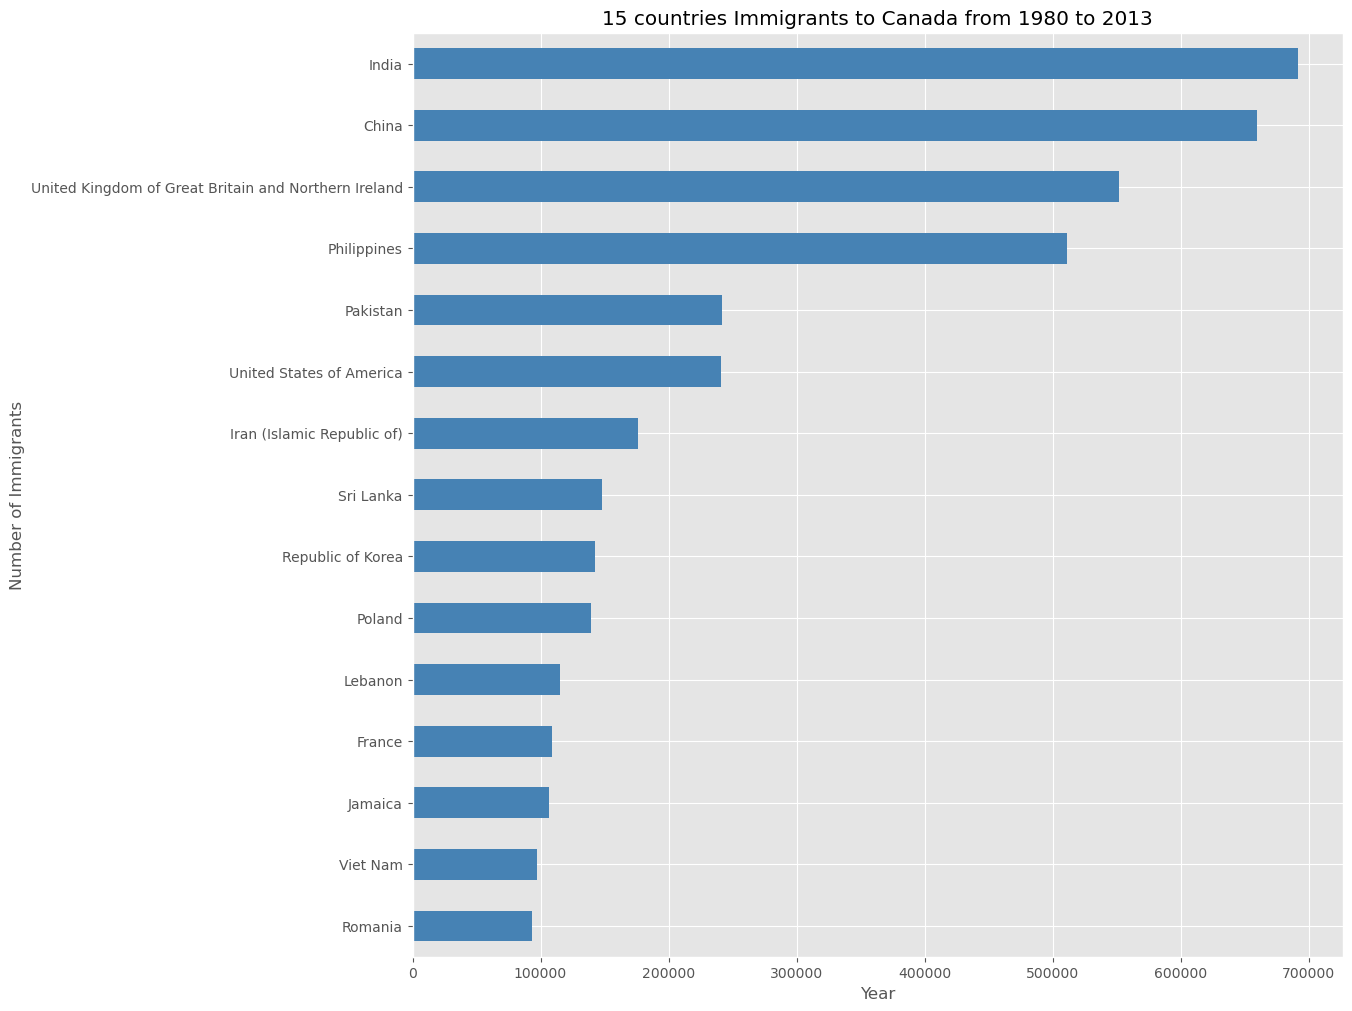

In [46]:
### type your answer here

df_top15.plot(kind='barh', figsize=(12, 12), color='steelblue') 

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('15 countries Immigrants to Canada from 1980 to 2013')

#for index, value in enumerate(df_top15): 
label = format(int(value), ',') # format int with commas
plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')
plt.show()



Click đúp  __vào đây__ để xem lời giải.
<!-- The correct answer is:
\\ # generate plot
df_top15.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('Number of Immigrants')
plt.title('Top 15 Conuntries Contributing to the Immigration to Canada between 1980 - 2013')
-->

<!--
\\ # annotate value labels to each country
for index, value in enumerate(df_top15): 
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')
-->

<!--
plt.show()
-->